In [ ]:
pip install yfinance 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing the yfinance to access the data
import yfinance as ydatabase

In [ ]:
#downloading the required Bit-Coin data and storing it in a variable 
data= ydatabase.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
#Displaying the data stored in the local variable
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-05-07,28901.623047,29157.517578,28441.367188,28454.978516,28454.978516,11301355486
2023-05-08,28450.457031,28663.271484,27310.134766,27694.273438,27694.273438,19122903752
2023-05-09,27695.068359,27821.400391,27375.601562,27658.775391,27658.775391,14128593256


In [ ]:
#importing necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go

In [ ]:


# Create a trace for the data
trace = go.Scatter(
    x=data.index,
    y=data['Adj Close'],
    mode='lines'
)

# Create a layout for the chart
layout = go.Layout(
    title='Time Series Data',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Adjusted Close')
)

# Create the figure object and plot the chart
fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [ ]:
#Splitting the data into training data and testing data
rdata=int(len(data)*0.9)
data_train=list(data[0:rdata]['Adj Close'])
data_test=list(data[rdata:]['Adj Close'])
data_test


[19784.7265625,
 19269.3671875,
 19242.255859375,
 19297.076171875,
 20231.26171875,
 20190.115234375,
 20548.24609375,
 21637.587890625,
 21731.1171875,
 21592.20703125,
 20860.44921875,
 19970.556640625,
 19323.9140625,
 20212.07421875,
 20569.919921875,
 20836.328125,
 21190.31640625,
 20779.34375,
 22485.689453125,
 23389.43359375,
 23231.732421875,
 23164.62890625,
 22714.978515625,
 22465.478515625,
 22609.1640625,
 21361.701171875,
 21239.75390625,
 22930.548828125,
 23843.88671875,
 23804.6328125,
 23656.20703125,
 23336.896484375,
 23314.19921875,
 22978.1171875,
 22846.5078125,
 22630.95703125,
 23289.314453125,
 22961.279296875,
 23175.890625,
 23809.486328125,
 23164.318359375,
 23947.642578125,
 23957.529296875,
 24402.818359375,
 24424.068359375,
 24319.333984375,
 24136.97265625,
 23883.291015625,
 23335.998046875,
 23212.73828125,
 20877.552734375,
 21166.060546875,
 21534.12109375,
 21398.908203125,
 21528.087890625,
 21395.01953125,
 21600.904296875,
 20260.01953125,


In [ ]:
import plotly.graph_objs as go

# Create the trace for the training data
trace_train = go.Scatter(
    x=data.index[0:rdata],
    y=data['Adj Close'][0:rdata],
    mode='lines',
    name='Train data'
)

# Create the trace for the testing data
trace_test = go.Scatter(
    x=data.index[rdata:],
    y=data['Adj Close'][rdata:],
    mode='lines',
    name='Test data'
)

# Create the layout for the chart
layout = go.Layout(
    title='Closing Prices',
    xaxis=dict(title='Dates'),
    yaxis=dict(title='Closing Prices'),
    legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)')
)

# Create the figure object and plot the chart
fig = go.Figure(data=[trace_train, trace_test], layout=layout)
fig.show()


In [ ]:
#creating a local variable to store the prediction data
m_predict = []
n_test_obser = len(data_test)


In [ ]:
# Fit the ARIMA model to the training data
model = ARIMA(data_train, order=(4,1,0))
model_fit = model.fit()

# Make predictions on the testing data
model_predictions = model_fit.forecast(steps=n_test_obser)[0]

# Print the predicted values
print(model_predictions)


20082.55324678183


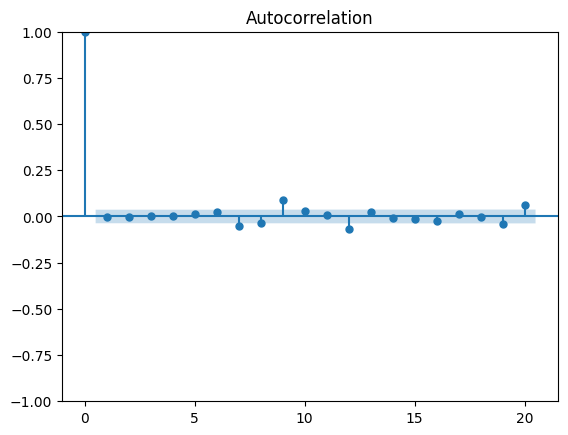

In [ ]:
plot_acf(model_fit.resid, lags=20)
plt.show()

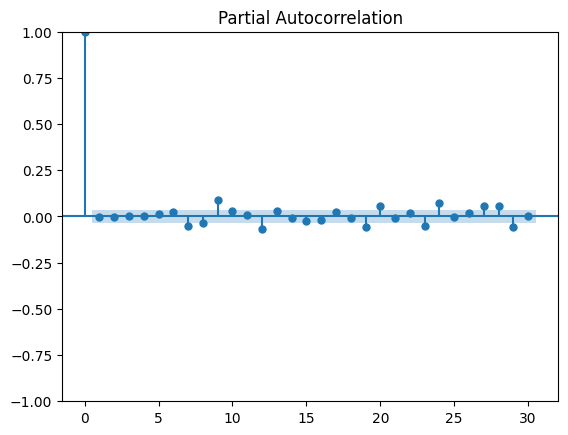

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Extract the residuals from the model
residuals = model_fit.resid

# Plot the PACF of the residuals
plot_pacf(residuals, lags=30)
plt.show()


In [ ]:
import statsmodels.api as sm

m_predict = []

# Define the order of the ARIMA model
order = (4, 1, 0)

# Train the ARIMA model on the training data
model = sm.tsa.ARIMA(data_train, order=order)
model_fit = model.fit()

# Make predictions on the testing data
for i in range(n_test_obser):
    # Get the actual test value
    actual_test_value = data_test[i]
    
    # Add the actual test value to the training data
    data_train.append(actual_test_value)
    
    # Fit the ARIMA model to the updated training data
    model = sm.tsa.ARIMA(data_train, order=order)
    model_fit = model.fit()
    
    # Use the fitted model to make a prediction
    output = model_fit.forecast()
    yhat = output[0]
    
    # Add the prediction to the list of model predictions
    m_predict.append(yhat)


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3156
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -25523.403
Date:                Mon, 08 May 2023   AIC                          51056.806
Time:                        14:59:09   BIC                          51087.090
Sample:                             0   HQIC                         51067.671
                               - 3156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0243      0.009     -2.609      0.009      -0.043      -0.006
ar.L2          0.0075      0.009      0.841      0.400      -0.010       0.025
ar.L3          0.0202      0.010      2.117      0.0

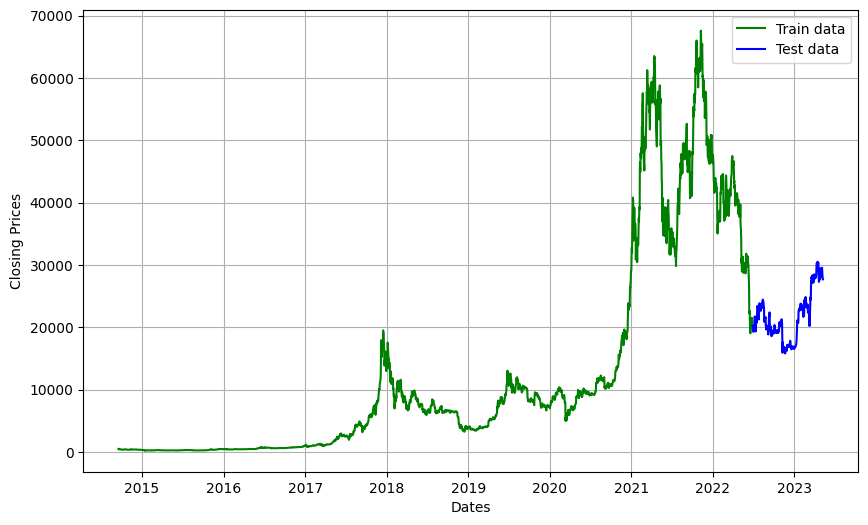

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.grid(True)
ax.set_xlabel('Dates')
ax.set_ylabel('Closing Prices')

ax.plot(data[0:rdata]['Adj Close'], 'green', label='Train data')
ax.plot(data[rdata:]['Adj Close'], 'blue', label='Test data')

ax.legend()


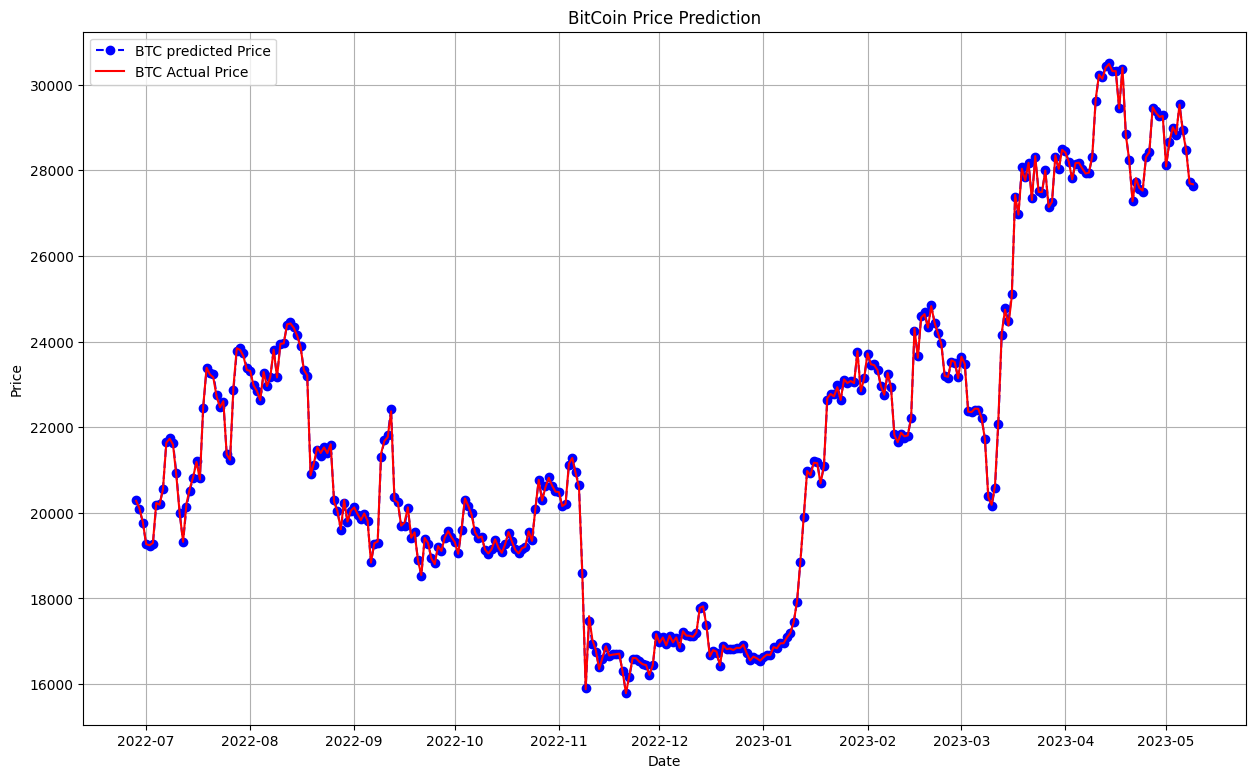

In [ ]:

plt.figure(figsize=(15,9))
plt.grid(True)
date_range = data[rdata:].index
plt.plot(date_range,m_predict,color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC predicted Price')
plt.plot(date_range,data_test,color = 'red', label = 'BTC Actual Price')
plt.title('BitCoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(data_test))/np.abs(data_test))
print('MAPE:' +str(mape))

MAPE:0.13859816288543894


In [ ]:

#MAPE stands for Mean Absolute Percentage Error and it is a metric used to evaluate the accuracy of a forecasting model.
# The value of MAPE you provided, 0.13985947327498371, indicates that the average absolute percentage error of the model's predictions is 13.99%.

#This means that on average, the model's predictions differ from the actual values by 13.99%.
